# R의 데이터 시각화 

  - **(학습목표)** 그래픽 문법(Grammar of Graphics)을 따라서 그래프를 그리고 시각화하는 R의 데이터 시각화 방법의 특성을 학습해본다.

## 1. ggplot이란


### 1.1 ggplot 개요
<ggplot에 대한 설명 추가> ... </ggplot에 대한 설명 추가>

그림 1.1 ggplot의 계층적 구현도

![그림1-1](image/Layers_ggplot.png)

그림 1.2 그래픽 문법(grammar of graphics) 계층구조 모식도

![그림1-2](image/gglayers.png)


그림 1.3 그래픽 문법(grammar of graphics)의 코드 문법

![그림1-3](image/major_components.webp)

그림 1.4 그래픽 문법(grammar of graphics)의 코드 문법

![그림1-4](image/ggplot_basics.png)

그림 1.5 그래픽 문법(grammar of graphics)의 코드 문법

![그림1-5](image/ggplot2_comp_step.png)

### 1.2 ggplot 사용하기

일반적인 입력 인자들에 대해 정리

  - **Data** :
      + your data, in tidy format, will provide ingredients for your plot
      + use `dplyr` techniques to prepare data for optimal plotting format
      + usually, this means you should have one row for every observation that you want to plot


   - **Aesthetics** (aes), to make data visible: 
   
      + `x, y`: variable along the x and y axis
      + `colour`: color of geoms according to data
      + `fill`: the inside color of the geom
      + `group`: what group a geom belongs to
      + `shape`: the figure used to plot a point
      + `linetype`: the type of line used (solid, dashed, etc)
      + `size`: size scaling for an extra dimension
      + `alpha`: the transparency of the geom

  - **Geometric objects** (geoms - determines the type of plot)
      + `geom_point()`: scatterplot
      + `geom_line()`: lines connecting points by increasing value of x
      + `geom_path()`: lines connecting points in sequence of appearance
      + `geom_boxplot()`: box and whiskers plot for categorical variables
      + `geom_bar()`: bar charts for categorical x axis
      + `geom_histogram()`: histogram for continuous x axis
      + `geom_violin()`: distribution kernel of data dispersion
      + `geom_smooth()`: function line based on data

  - **Facets**
  
      + `facet_wrap()` or `facet_grid()` for small multiples

  - **Statistics**
      + similar to geoms, but computed
      + show means, counts, and other statistical summaries of data

  - **Coordinates** - fitting data onto a page
      + `coord_cartesian` to set limits
      + `coord_polar` for circular plots
      + `coord_map` for different map projections

  - **Themes**'
      + overall visual defaults
      + fonts, colors, shapes, outlines

### 1.3 Putting these layers together
Let’s try it out! Here are the basic steps to build a plot. You can refer back to these steps throughout the workshop if you need help!

1. Create a simple plot object:
    - `plot.object <- ggplot()`

2. Add geometric layers:
    - `plot.object <- plot.object + geom_*()`

3. Add appearance layers:
    - `plot.object <- plot.object + coord_*() + theme()`

4. Repeat step 2-3 until satisfied, then print:
    - `plot.object` or `print(plot.object)`

In [3]:
sessionInfo()

R version 4.3.0 (2023-04-21 ucrt)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 11 x64 (build 22621)

Matrix products: default


locale:
[1] LC_COLLATE=Korean_Korea.utf8  LC_CTYPE=Korean_Korea.utf8   
[3] LC_MONETARY=Korean_Korea.utf8 LC_NUMERIC=C                 
[5] LC_TIME=Korean_Korea.utf8    

time zone: Asia/Seoul
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] digest_0.6.31   IRdisplay_1.1   utf8_1.2.3      base64enc_0.1-3
 [5] fastmap_1.1.1   glue_1.6.2      htmltools_0.5.5 repr_1.1.6     
 [9] lifecycle_1.0.3 cli_3.6.1       fansi_1.0.4     vctrs_0.6.2    
[13] pbdZMQ_0.3-9    compiler_4.3.0  tools_4.3.0     evaluate_0.21  
[17] pillar_1.9.0    crayon_1.5.2    rlang_1.1.1     jsonlite_1.8.4 
[21] IRkernel_1.3.2  uuid_1.1-0     

In [2]:
.libPaths()

[1] "C:/Program Files/R/R-4.3.0/library"

## 2. 데이터 시각화 해보기

### 예제 데이터 펭귄스 톺아보기

In [20]:
library(tidyverse)
library(palmerpenguins)
library(GGally)

In [12]:
search()

[1] ".GlobalEnv"             "package:palmerpenguins" "package:lubridate"     
 [4] "package:forcats"        "package:stringr"        "package:dplyr"         
 [7] "package:purrr"          "package:readr"          "package:tidyr"         
[10] "package:tibble"         "package:ggplot2"        "package:tidyverse"     
[13] "jupyter:irkernel"       "package:stats"          "package:graphics"      
[16] "package:grDevices"      "package:utils"          "package:datasets"      
[19] "package:methods"        "Autoloads"              "package:base"

In [13]:
str(penguins)

tibble [344 × 8] (S3: tbl_df/tbl/data.frame)
 $ species          : Factor w/ 3 levels "Adelie","Chinstrap",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ island           : Factor w/ 3 levels "Biscoe","Dream",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ bill_length_mm   : num [1:344] 39.1 39.5 40.3 NA 36.7 39.3 38.9 39.2 34.1 42 ...
 $ bill_depth_mm    : num [1:344] 18.7 17.4 18 NA 19.3 20.6 17.8 19.6 18.1 20.2 ...
 $ flipper_length_mm: int [1:344] 181 186 195 NA 193 190 181 195 193 190 ...
 $ body_mass_g      : int [1:344] 3750 3800 3250 NA 3450 3650 3625 4675 3475 4250 ...
 $ sex              : Factor w/ 2 levels "female","male": 2 1 1 NA 1 2 1 2 NA NA ...
 $ year             : int [1:344] 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 ...


In [14]:
class(penguins)

[1] "tbl_df"     "tbl"        "data.frame"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

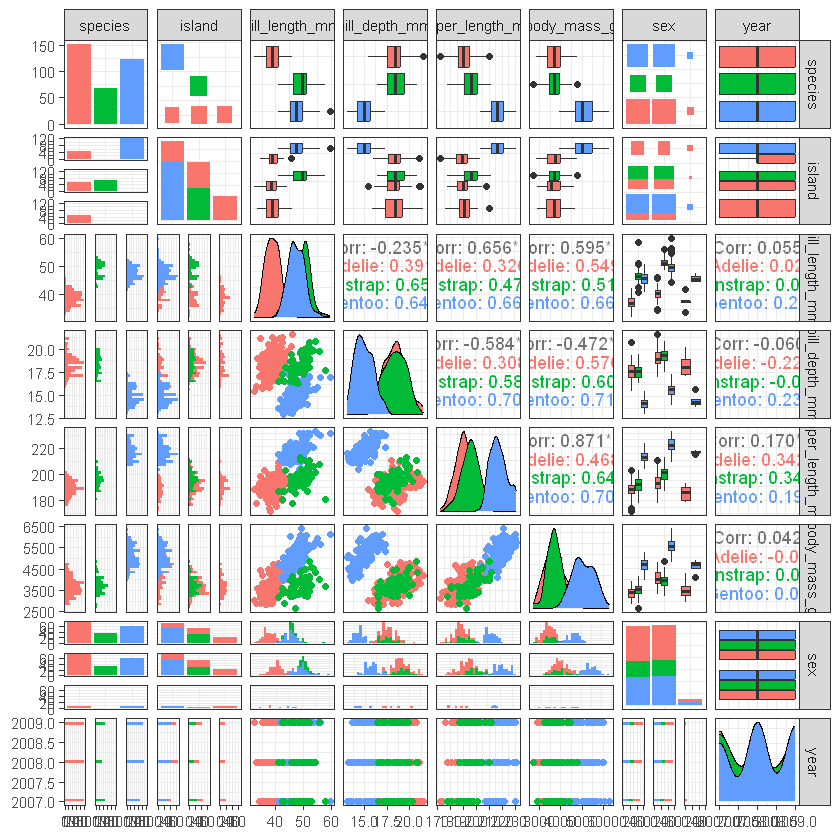

In [23]:
options(warn = -1)
ggpairs(penguins, aes(colour = species), progress = FALSE) +
    theme_bw()

`geom_smooth()` using formula = 'y ~ x'


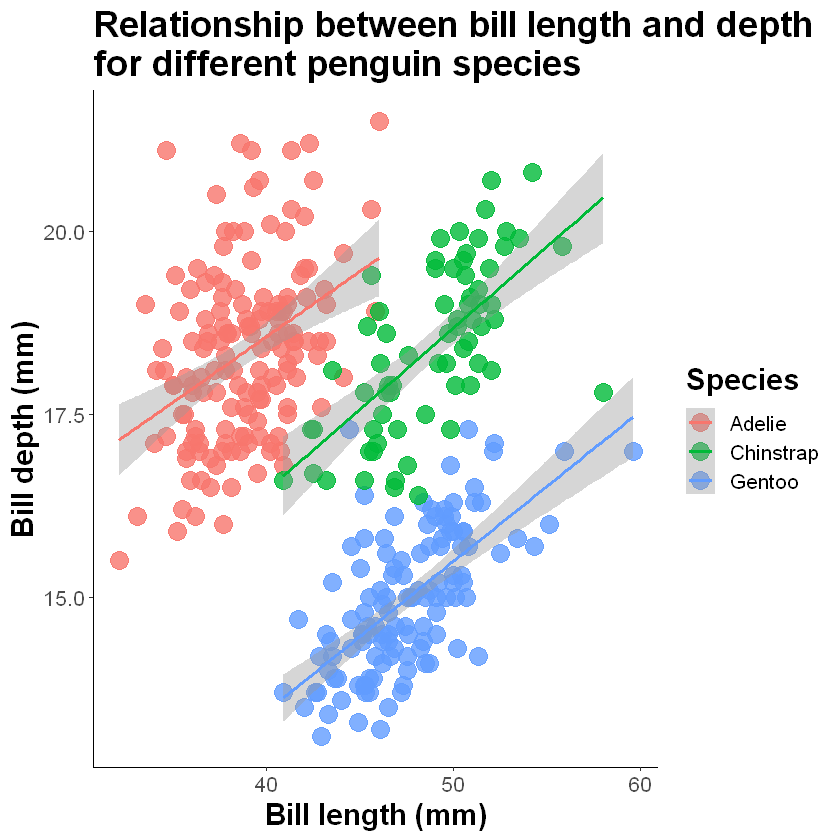

In [24]:
# Let's explore how some of this data is structured by species
ggplot(data = penguins,               # Data
       aes(x = bill_length_mm,        # Your X-value
           y = bill_depth_mm,         # Your Y-value
           col = species)) +          # Aesthetics
  geom_point(size = 5, alpha = 0.8) + # Point
  geom_smooth(method = "lm") +        # Linear regression
  labs(title = "Relationship between bill length and depth\nfor different penguin species", # Title
       x = "Bill length (mm)", # X-axis title
       y = "Bill depth (mm)", # Y-axis title
       col = "Species") +  # Colour data point by species (also creates legend)
  theme_classic() + # Apply a clean theme
  theme(title = element_text(size = 18, face = "bold"),
      text = element_text(size = 16))

### 2.1 데이터 레이어(data layer)

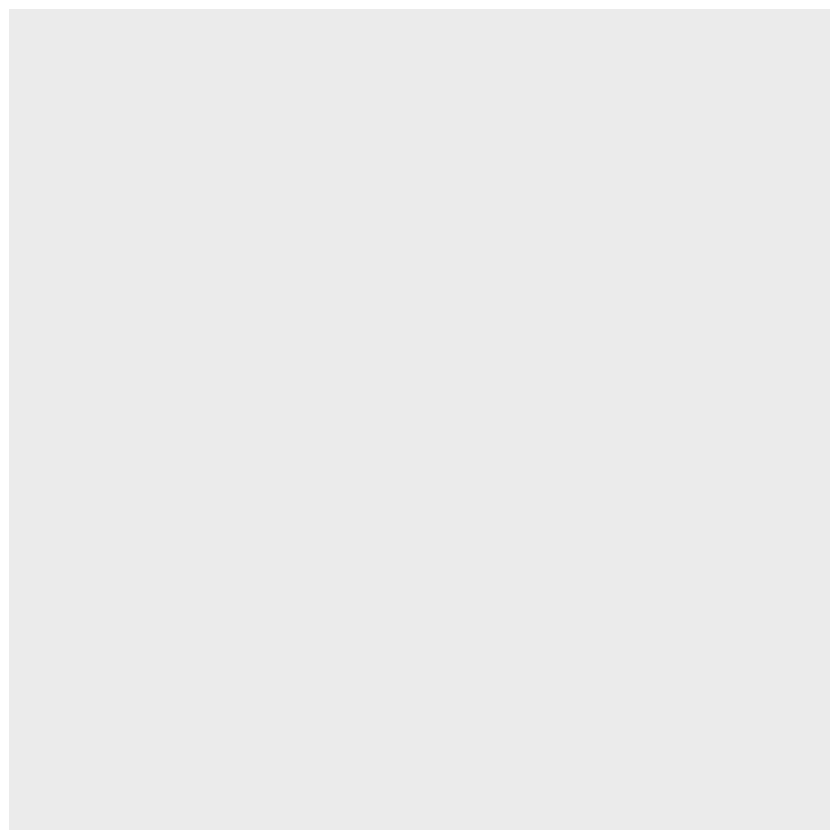

In [25]:
# Layer 1: Data
ggplot(data = penguins)

### 2.2 심미적 레이어(Aesthetics layer)

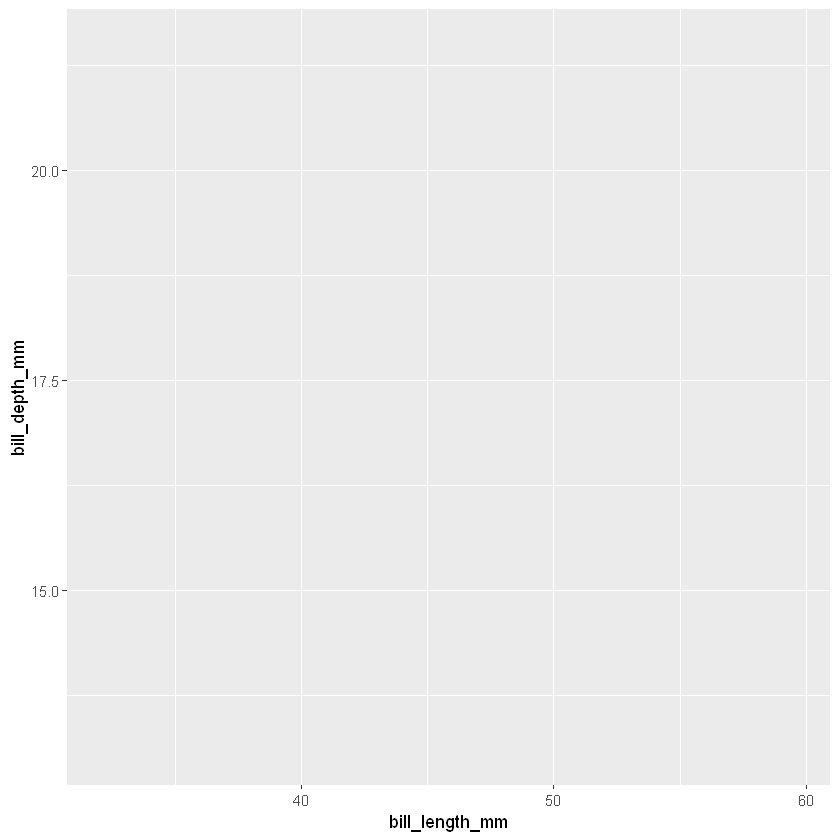

In [26]:
# Next layer: aesthetics.  Here, we tell R to plot length
# on the x axis, and depth on the y axis but we still
# haven't told R how we want these data to be
# represented...
ggplot(data = penguins, aes(x = bill_length_mm, y = bill_depth_mm))

### 2.3 기하적 레이어(Geometric layer)

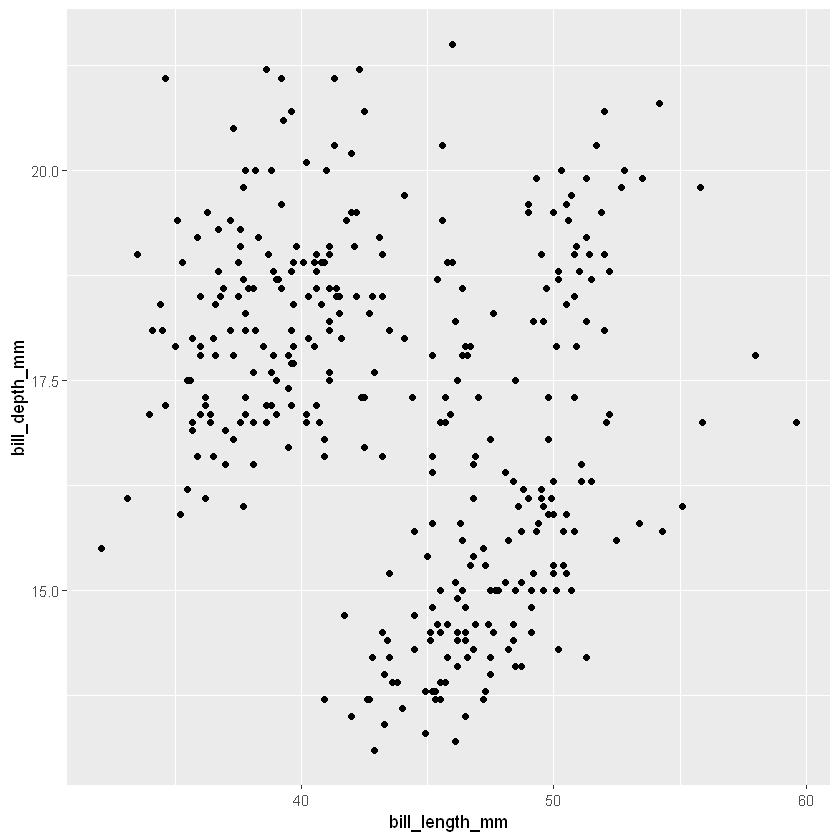

In [27]:
# Next layer(s): geometric object(s)
ggplot(data = penguins, 
       aes(x = bill_length_mm, 
           y = bill_depth_mm)) + # Use the plus sign to add each additional layer
  geom_point() # The geom layer determines what style of plot we are using.

### 2.4 면, 축, 테마(Facets, Coordinates, Themes)

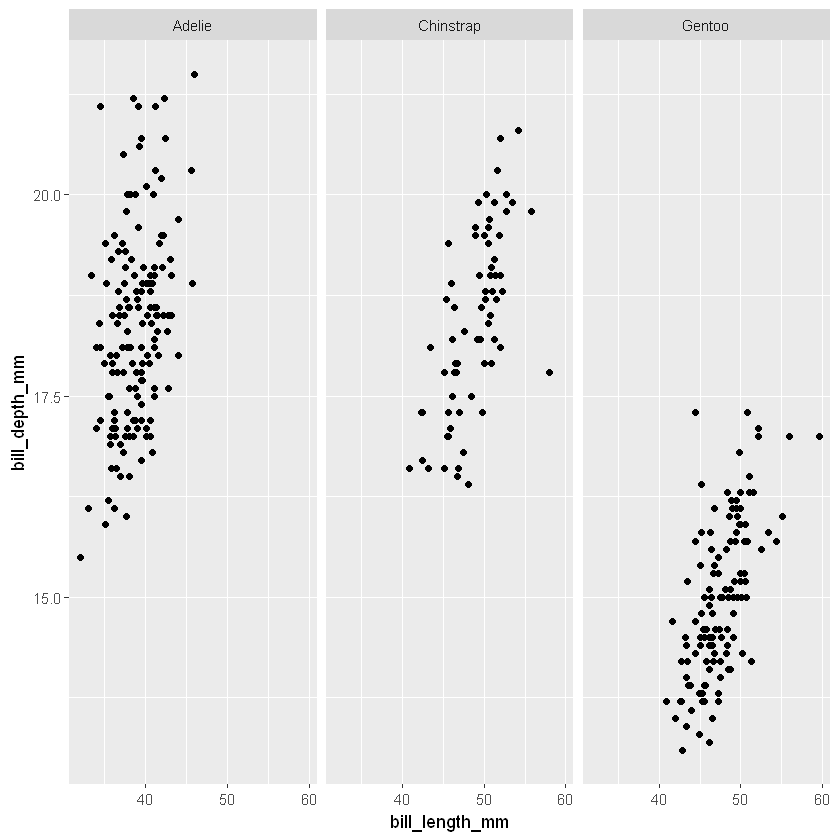

In [28]:
# Next layer(s): customizations!  Facets split a plot into
# separate windows according to some category in the data.
ggplot(data = penguins, aes(x = bill_length_mm, y = bill_depth_mm)) +
    geom_point() + facet_wrap(vars(species))  
# This splits the plot into three windows: one per species

## 3. ggplot의 다양한 그래프 사용해 보기

### 3.1 Bar chart (Error bar)

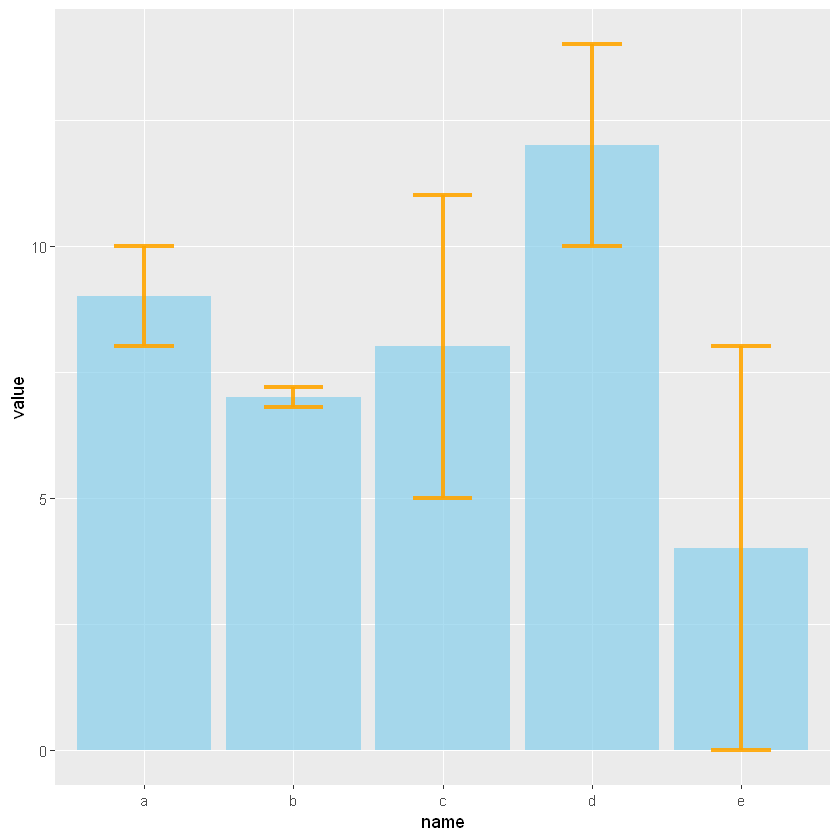

In [33]:
# Load ggplot2
library(ggplot2)

# create dummy data
data <- data.frame(
  name=letters[1:5],
  value=sample(seq(4,15),5),
  sd=c(1,0.2,3,2,4)
)
 
# Most basic error bar
ggplot(data) +
    geom_bar( aes(x=name, y=value), stat="identity", fill="skyblue", alpha=0.7) +
    geom_errorbar( aes(x=name, ymin=value-sd, ymax=value+sd), width=0.4, colour="orange", alpha=0.9, size=1.3)

### 3.2 line chart (Basic customization)

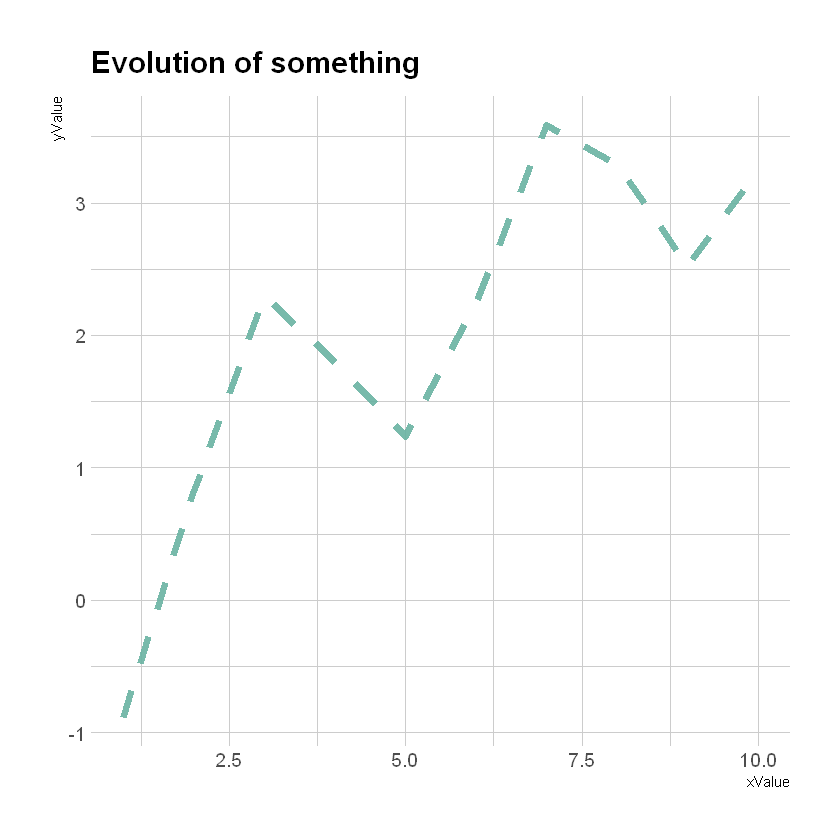

In [34]:
# Libraries
library(ggplot2)
library(hrbrthemes)

# create data
xValue <- 1:10
yValue <- cumsum(rnorm(10))
data <- data.frame(xValue,yValue)

# Plot
ggplot(data, aes(x=xValue, y=yValue)) +
  geom_line( color="#69b3a2", size=2, alpha=0.9, linetype=2) +
  theme_ipsum() +
  ggtitle("Evolution of something")

### 3.3 Animations

In [8]:
# Get data:
library(gapminder)
 
# Charge libraries:
library(ggplot2)
library(gganimate)
 
# Make a ggplot, but add frame=year: one image per year
ggplot(gapminder, aes(gdpPercap, lifeExp, size = pop, color = continent)) +
  geom_point() +
  scale_x_log10() +
  theme_bw() +
  # gganimate specific bits:
  labs(title = 'Year: {frame_time}', x = 'GDP per capita', y = 'life expectancy') +
  transition_time(year) +
  ease_aes('linear')

# Save at gif:
anim_save("test.gif")


Rendering [>-------------------------------------------] at 7.6 fps ~ eta: 13s

Rendering [>-------------------------------------------] at 7.4 fps ~ eta: 13s

Rendering [=>------------------------------------------] at 7.4 fps ~ eta: 13s

Rendering [==>-----------------------------------------] at 7.1 fps ~ eta: 13s

Rendering [===>------------------------------------------] at 7 fps ~ eta: 13s

Rendering [====>-----------------------------------------] at 7 fps ~ eta: 13s

Rendering [====>---------------------------------------] at 6.9 fps ~ eta: 13s

Rendering [=====>--------------------------------------] at 6.9 fps ~ eta: 13s

Rendering [======>-------------------------------------] at 6.9 fps ~ eta: 12s

Rendering [======>-------------------------------------] at 6.8 fps ~ eta: 12s

Rendering [======>-------------------------------------] at 6.7 fps ~ eta: 12s

Rendering [=======>------------------------------------] at 6.7 fps ~ eta: 12s

Rendering [========>-------------------

  [1] "./gganim_plot0001.png" "./gganim_plot0002.png" "./gganim_plot0003.png"
  [4] "./gganim_plot0004.png" "./gganim_plot0005.png" "./gganim_plot0006.png"
  [7] "./gganim_plot0007.png" "./gganim_plot0008.png" "./gganim_plot0009.png"
 [10] "./gganim_plot0010.png" "./gganim_plot0011.png" "./gganim_plot0012.png"
 [13] "./gganim_plot0013.png" "./gganim_plot0014.png" "./gganim_plot0015.png"
 [16] "./gganim_plot0016.png" "./gganim_plot0017.png" "./gganim_plot0018.png"
 [19] "./gganim_plot0019.png" "./gganim_plot0020.png" "./gganim_plot0021.png"
 [22] "./gganim_plot0022.png" "./gganim_plot0023.png" "./gganim_plot0024.png"
 [25] "./gganim_plot0025.png" "./gganim_plot0026.png" "./gganim_plot0027.png"
 [28] "./gganim_plot0028.png" "./gganim_plot0029.png" "./gganim_plot0030.png"
 [31] "./gganim_plot0031.png" "./gganim_plot0032.png" "./gganim_plot0033.png"
 [34] "./gganim_plot0034.png" "./gganim_plot0035.png" "./gganim_plot0036.png"
 [37] "./gganim_plot0037.png" "./gganim_plot0038.png" "./gganim_

ERROR: Error: The animation object does not specify a save_animation method


In [43]:
# Charge libraries:
library(ggplot2)
library(gganimate)
 
# Make a ggplot, but add frame=year: one image per year
ggplot(gapminder, aes(gdpPercap, lifeExp, size = pop, colour = country)) +
  geom_point(alpha = 0.7, show.legend = FALSE) +
  scale_colour_manual(values = country_colors) +
  scale_size(range = c(2, 12)) +
  scale_x_log10() +
  facet_wrap(~continent) +
  # Here comes the gganimate specific bits
  labs(title = 'Year: {frame_time}', x = 'GDP per capita', y = 'life expectancy') +
  transition_time(year) +
  ease_aes('linear')


# Save at gif:
anim_save("271-ggplot2-animated-gif-chart-with-gganimate2.gif")


Rendering [>-------------------------------------------] at 6.3 fps ~ eta: 15s

Rendering [>-------------------------------------------] at 6.2 fps ~ eta: 16s

Rendering [=>------------------------------------------] at 6.1 fps ~ eta: 16s

Rendering [==>-----------------------------------------] at 6.1 fps ~ eta: 15s

Rendering [==>-------------------------------------------] at 6 fps ~ eta: 15s

Rendering [===>------------------------------------------] at 6 fps ~ eta: 15s

Rendering [====>-----------------------------------------] at 6 fps ~ eta: 15s

Rendering [=====>----------------------------------------] at 6 fps ~ eta: 15s

Rendering [=====>--------------------------------------] at 5.9 fps ~ eta: 15s

Rendering [======>-------------------------------------] at 5.9 fps ~ eta: 14s

Rendering [=======>------------------------------------] at 5.9 fps ~ eta: 14s

Rendering [=======>------------------------------------] at 5.8 fps ~ eta: 14s

Rendering [========>-------------------

  [1] "./gganim_plot0001.png" "./gganim_plot0002.png" "./gganim_plot0003.png"
  [4] "./gganim_plot0004.png" "./gganim_plot0005.png" "./gganim_plot0006.png"
  [7] "./gganim_plot0007.png" "./gganim_plot0008.png" "./gganim_plot0009.png"
 [10] "./gganim_plot0010.png" "./gganim_plot0011.png" "./gganim_plot0012.png"
 [13] "./gganim_plot0013.png" "./gganim_plot0014.png" "./gganim_plot0015.png"
 [16] "./gganim_plot0016.png" "./gganim_plot0017.png" "./gganim_plot0018.png"
 [19] "./gganim_plot0019.png" "./gganim_plot0020.png" "./gganim_plot0021.png"
 [22] "./gganim_plot0022.png" "./gganim_plot0023.png" "./gganim_plot0024.png"
 [25] "./gganim_plot0025.png" "./gganim_plot0026.png" "./gganim_plot0027.png"
 [28] "./gganim_plot0028.png" "./gganim_plot0029.png" "./gganim_plot0030.png"
 [31] "./gganim_plot0031.png" "./gganim_plot0032.png" "./gganim_plot0033.png"
 [34] "./gganim_plot0034.png" "./gganim_plot0035.png" "./gganim_plot0036.png"
 [37] "./gganim_plot0037.png" "./gganim_plot0038.png" "./gganim_

ERROR: Error: The animation object does not specify a save_animation method


In [3]:
sessionInfo()

R version 4.3.0 (2023-04-21 ucrt)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 11 x64 (build 22621)

Matrix products: default


locale:
[1] LC_COLLATE=Korean_Korea.utf8  LC_CTYPE=Korean_Korea.utf8   
[3] LC_MONETARY=Korean_Korea.utf8 LC_NUMERIC=C                 
[5] LC_TIME=Korean_Korea.utf8    

time zone: Asia/Seoul
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] gganimate_1.0.8 ggplot2_3.4.2   gapminder_1.0.0

loaded via a namespace (and not attached):
 [1] gtable_0.3.3      jsonlite_1.8.4    dplyr_1.1.2       compiler_4.3.0   
 [5] crayon_1.5.2      tidyselect_1.2.0  IRdisplay_1.1     progress_1.2.2   
 [9] scales_1.2.1      uuid_1.1-0        fastmap_1.1.1     IRkernel_1.3.2   
[13] R6_2.5.1          labeling_0.4.2    generics_0.1.3    tibble_3.2.1     
[17] munsell_0.5.0     pillar_1.9.0      rlang_1.1.1       utf8_1.2.3       
[21] stringi_1.7.12    repr_1

In [4]:
.libPaths()

[1] "C:/Program Files/R/R-4.3.0/library"

In [5]:
install.packages("gifski")

package 'gifski' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\BEGAS-159\AppData\Local\Temp\RtmpKWvcSu\downloaded_packages


In [6]:
install.packages("av")

package 'av' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\BEGAS-159\AppData\Local\Temp\RtmpKWvcSu\downloaded_packages


In [7]:
library(gifski)
library(av)